In [2]:
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data = data[data['Glucose'] != 0]
data = data[data['BloodPressure'] != 0]
data = data[data['SkinThickness'] != 0]
data = data[data['Insulin'] != 0]
data = data[data['BMI'] != 0]
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


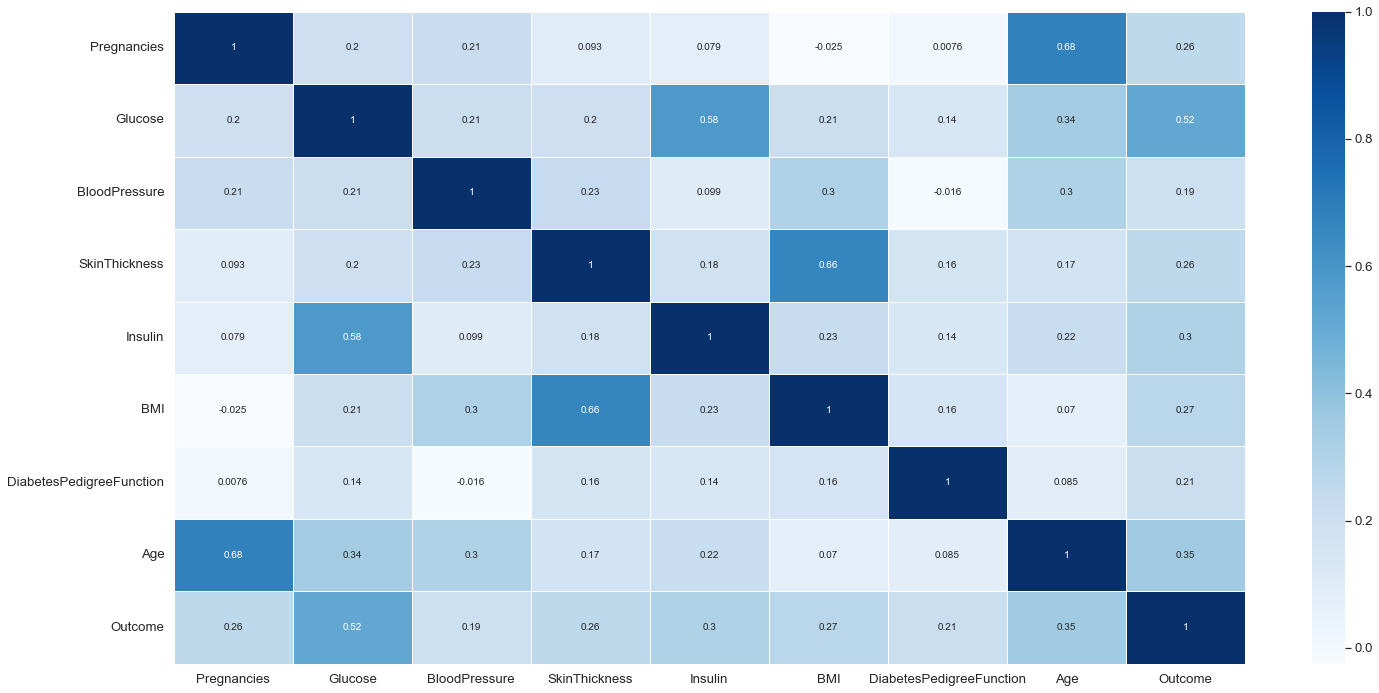

In [7]:
corr = data.corr()
sns.set(font_scale=1.2)
_, ax = plt.subplots(figsize = (24, 12))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=1, ax=ax)
plt.show()

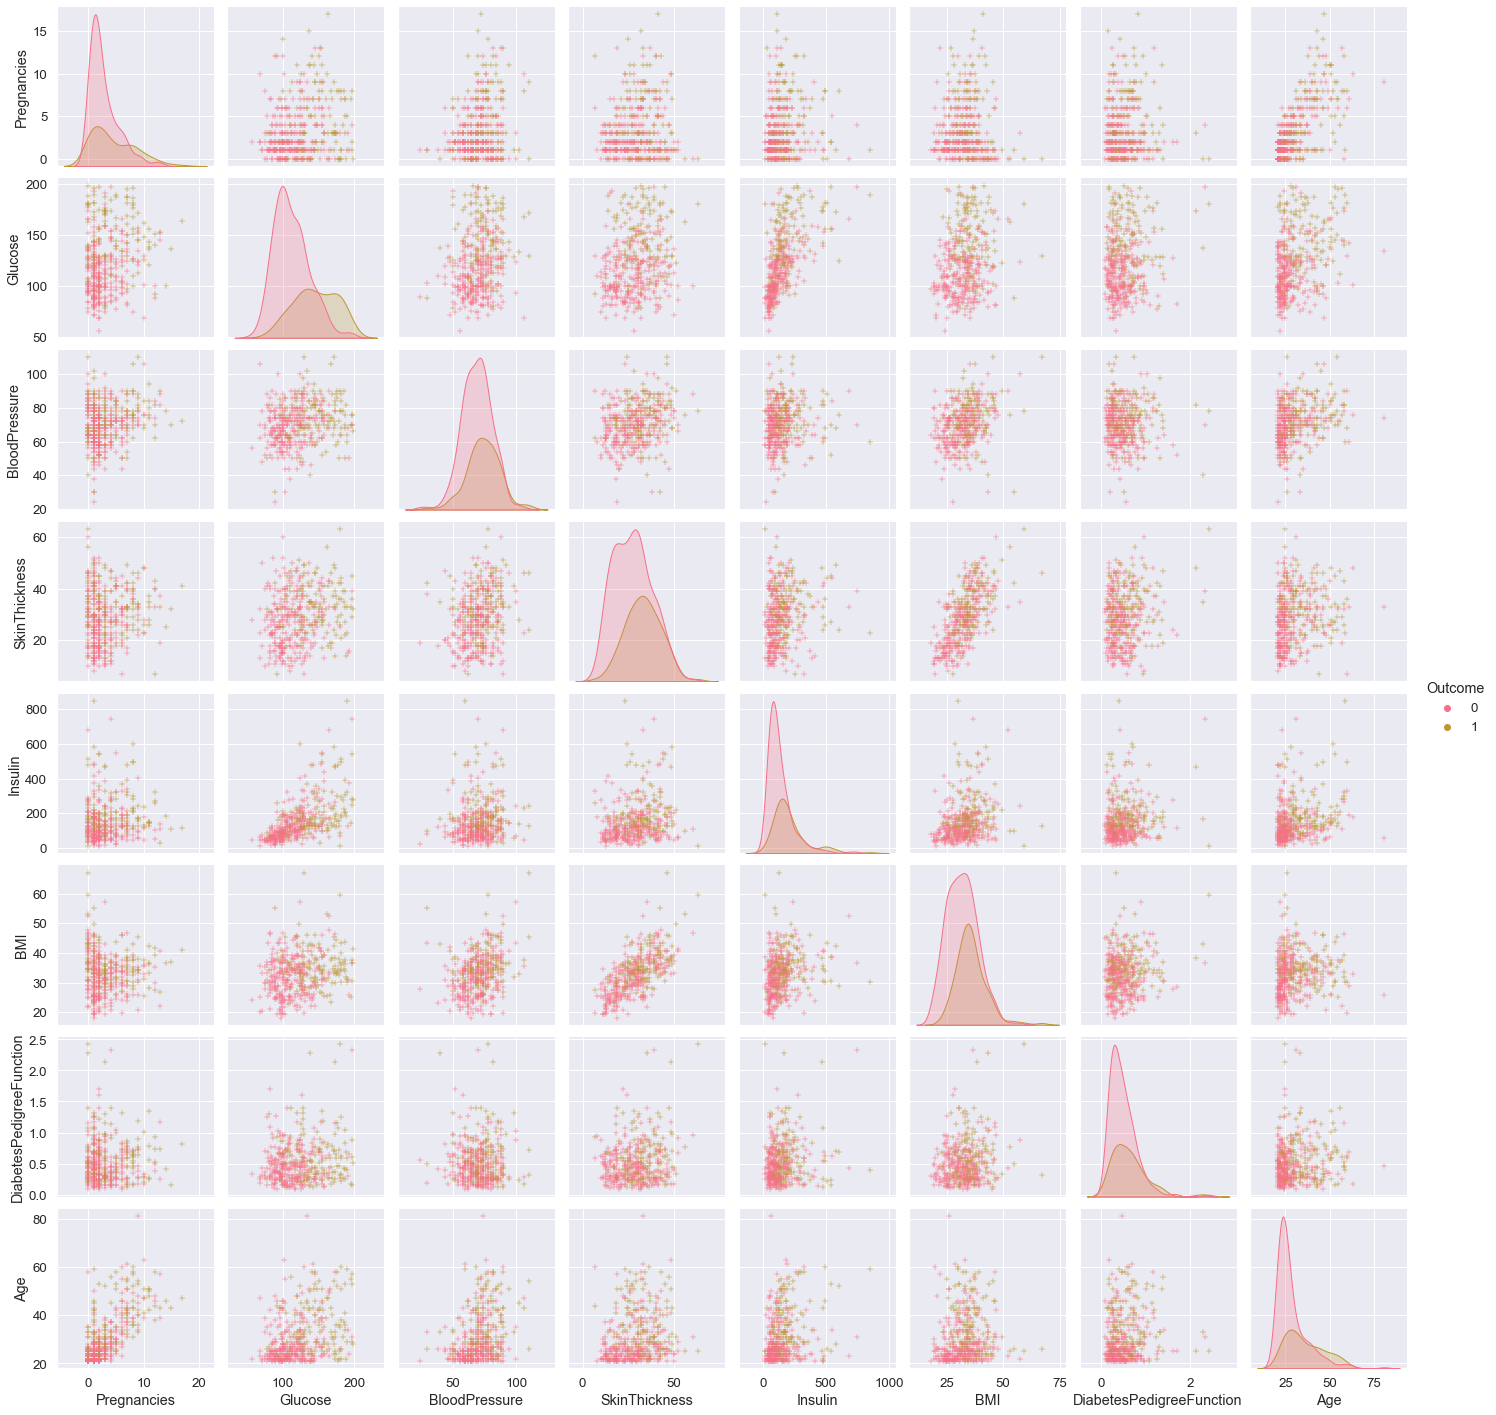

In [8]:
sns.set_palette('husl')
sns.pairplot(data, hue='Outcome', markers='+')

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

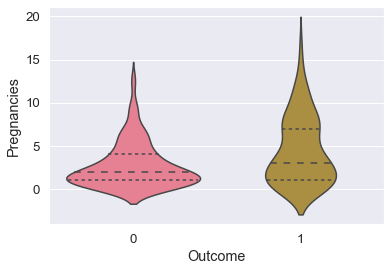

In [9]:
sns.violinplot(y='Pregnancies', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

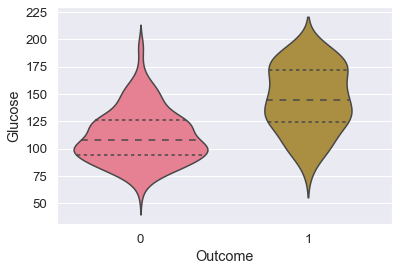

In [10]:
sns.violinplot(y='Glucose', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

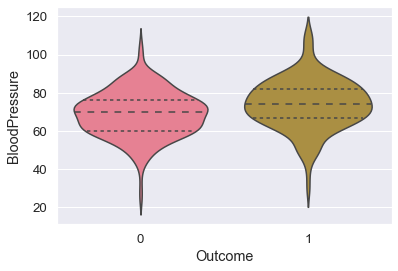

In [11]:
sns.violinplot(y='BloodPressure', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

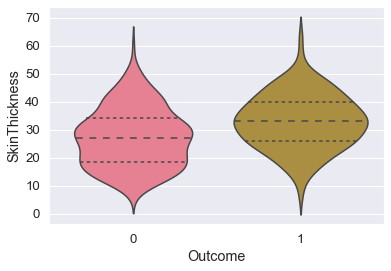

In [12]:
sns.violinplot(y='SkinThickness', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

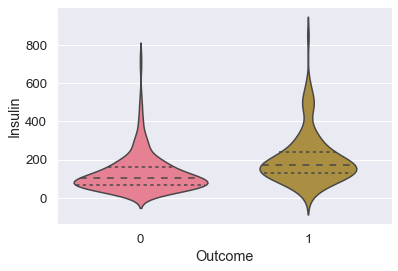

In [13]:
sns.violinplot(y='Insulin', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

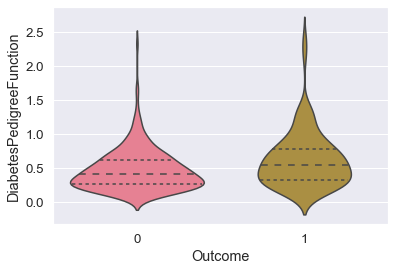

In [14]:
sns.violinplot(y='DiabetesPedigreeFunction', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

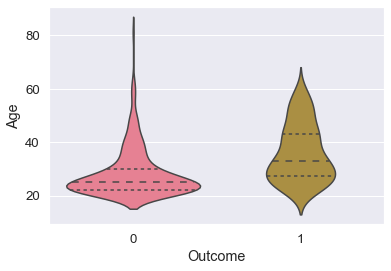

In [15]:
sns.violinplot(y='Age', x='Outcome', inner='quartile', data=data)

In [16]:
# Klasa statyczna zawierajaca metody przydatne do przetwarzania danych
class ProcessingData:

    # metoda tasujaca wiersze pd.DataFrame
    @staticmethod
    def shuffle(df: pd.DataFrame) -> pd.DataFrame:
        """
        Receives a DataFrame, randomly shuffles it and returns a shuffled version.
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        # kazdy element od konca do poczatku
        for idx in range(len(df) - 1, 0, -1):
            # wybieramy losowo 'rand_idx', czyli nowe miejsce elementu
            rand_idx = random.randint(0, idx)
            # zamieniamy
            df.iloc[idx], df.iloc[rand_idx] = df.iloc[rand_idx], df.iloc[idx]
        # zwracamy potasowany zbior ze zresetowanymi indeksami
        return df.reset_index(drop=True)

    # metoda normalizujaca kolumny pd.DataFrame za pomoca normalizacji z uzyciem odchylenia standardowego
    @staticmethod
    def normalize_std(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using std normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        # usuwam kolumne z klasami
        normalized = df.drop(labels=label, axis=1)
        # normalizuje wg wzoru z odchyleniem standardowym i zwracam zbior razem z wczesniej usunieta kolumna
        normalized = (normalized-normalized.mean())/(normalized.std())
        return normalized.join(df[label])

    # metoda normalizujaca kolumny pd.DataFrame za pomoca normalizacji minmax
    @staticmethod
    def normalize_minmax(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        # usuwam kolumne z klasami
        normalized = df.drop(labels=label, axis=1)
        # normalizuje wg wzoru z 'min' i 'max' i zwracam zbior razem z wczesniej usunieta kolumna
        normalized = (normalized-normalized.min())/(normalized.max()-normalized.min())
        return normalized.join(df[label])

    # metoda dzielaca pd.DataFrame na zbior treningowy oraz walidacyjny
    @staticmethod
    def split(df: pd.DataFrame, ratio: float) -> tuple[pd.DataFrame, pd.DataFrame]:
        """
        Receives a DataFrame and returns two dataframes, split into training and validation DataFrames.
        :param df: pd.DataFrame
        :param ratio: float
        :return training_df, validation_df: tuple[pd.DataFrame, pd.DataFrame]
        """
        # miejsce elementu dzielacego zbior w odpowiedniej proporcji wg 'ratio'
        cutoff = int(len(df) * ratio)
        # zwracam zbior treningowy i walidacyjny
        return df[:cutoff].reset_index(drop=True), df[cutoff:].reset_index(drop=True)

In [17]:
# Test metod klasy ProcessingData
shuffled_data = ProcessingData.shuffle(data)
shuffled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,100,74,40,215,39.4,0.661,43,1
1,2,98,60,17,120,34.7,0.198,22,0
2,1,172,68,49,579,42.4,0.702,28,1
3,2,106,64,35,119,30.5,1.400,34,0
4,0,135,68,42,250,42.3,0.365,24,1
...,...,...,...,...,...,...,...,...,...
387,0,180,90,26,90,36.5,0.314,35,1
388,0,95,64,39,105,44.6,0.366,22,0
389,2,99,60,17,160,36.6,0.453,21,0
390,1,117,88,24,145,34.5,0.403,40,1


In [18]:
normalized_data_std = ProcessingData.normalize_std(shuffled_data, 'Outcome')
normalized_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.463207,-0.733214,0.267022,1.032156,0.495987,0.898418,0.399302,1.189635,1
1,-0.405123,-0.798021,-0.853328,-1.154899,-0.303396,0.229632,-0.940831,-0.869031,0
2,-0.716511,1.599844,-0.213128,1.887960,3.558885,1.325303,0.517975,-0.280841,1
3,-0.405123,-0.538792,-0.533228,0.556709,-0.311811,-0.368007,2.538305,0.307350,0
4,-1.027899,0.400912,-0.213128,1.222335,0.790496,1.311073,-0.457457,-0.672968,1
...,...,...,...,...,...,...,...,...,...
387,-1.027899,1.859073,1.547423,-0.299095,-0.555833,0.485763,-0.605074,0.405381,1
388,-1.027899,-0.895232,-0.533228,0.937067,-0.429615,1.638351,-0.454563,-0.869031,0
389,-0.405123,-0.765617,-0.853328,-1.154899,0.033186,0.499992,-0.202745,-0.967063,0
390,-0.716511,-0.182353,1.387373,-0.489274,-0.093032,0.201173,-0.347468,0.895540,1


In [19]:
# Test dla normalizacji std
normalized_training_data_std, normalized_validation_data_std = ProcessingData.split(normalized_data_std, 0.7)
normalized_training_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.463207,-0.733214,0.267022,1.032156,0.495987,0.898418,0.399302,1.189635,1
1,-0.405123,-0.798021,-0.853328,-1.154899,-0.303396,0.229632,-0.940831,-0.869031,0
2,-0.716511,1.599844,-0.213128,1.887960,3.558885,1.325303,0.517975,-0.280841,1
3,-0.405123,-0.538792,-0.533228,0.556709,-0.311811,-0.368007,2.538305,0.307350,0
4,-1.027899,0.400912,-0.213128,1.222335,0.790496,1.311073,-0.457457,-0.672968,1
...,...,...,...,...,...,...,...,...,...
269,-0.716511,-0.506389,0.106972,0.081263,-0.623149,-0.325318,0.862415,-0.672968,0
270,-0.093734,1.567441,0.106972,0.366531,-0.177178,0.030419,-0.937937,-0.672968,1
271,-1.027899,-1.575707,-1.493528,-1.820525,-1.010219,-0.752203,-0.735325,-0.869031,0
272,1.463207,0.919369,0.587122,0.271441,0.453914,1.396450,-0.020394,0.503413,1


In [20]:
normalized_validation_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.217654,-1.024846,-0.053078,0.271441,-0.572662,0.001960,-0.223006,-0.869031,0
1,0.529042,-1.186864,-0.213128,-0.108916,-0.715709,-0.410695,-0.460351,-0.672968,0
2,1.774596,1.016580,0.587122,0.081263,-0.471687,-0.311089,-1.039243,1.385699,0
3,-1.027899,0.109279,1.067272,-0.013827,0.495987,-0.339548,-0.008816,-0.672968,0
4,-0.093734,-1.446093,-1.653578,0.271441,-0.572662,-0.296859,-0.796108,-0.476904,1
...,...,...,...,...,...,...,...,...,...
113,-1.027899,1.859073,1.547423,-0.299095,-0.555833,0.485763,-0.605074,0.405381,1
114,-1.027899,-0.895232,-0.533228,0.937067,-0.429615,1.638351,-0.454563,-0.869031,0
115,-0.405123,-0.765617,-0.853328,-1.154899,0.033186,0.499992,-0.202745,-0.967063,0
116,-0.716511,-0.182353,1.387373,-0.489274,-0.093032,0.201173,-0.347468,0.895540,1


In [21]:
normalized_data_minmax = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
normalized_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.470588,0.309859,0.581395,0.589286,0.241587,0.433538,0.246681,0.366667,1
1,0.117647,0.295775,0.418605,0.178571,0.127404,0.337423,0.048394,0.016667,0
2,0.058824,0.816901,0.511628,0.750000,0.679087,0.494888,0.264240,0.116667,1
3,0.117647,0.352113,0.465116,0.500000,0.126202,0.251534,0.563169,0.216667,0
4,0.000000,0.556338,0.511628,0.625000,0.283654,0.492843,0.119914,0.050000,1
...,...,...,...,...,...,...,...,...,...
387,0.000000,0.873239,0.767442,0.339286,0.091346,0.374233,0.098073,0.233333,1
388,0.000000,0.274648,0.465116,0.571429,0.109375,0.539877,0.120343,0.016667,0
389,0.117647,0.302817,0.418605,0.178571,0.175481,0.376278,0.157602,0.000000,0
390,0.058824,0.429577,0.744186,0.303571,0.157452,0.333333,0.136188,0.316667,1


In [22]:
# Test dla normalizacji minmax
normalized_training_data_minmax, normalized_validation_data_minmax = ProcessingData.split(normalized_data_minmax, 0.7)
normalized_training_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.470588,0.309859,0.581395,0.589286,0.241587,0.433538,0.246681,0.366667,1
1,0.117647,0.295775,0.418605,0.178571,0.127404,0.337423,0.048394,0.016667,0
2,0.058824,0.816901,0.511628,0.750000,0.679087,0.494888,0.264240,0.116667,1
3,0.117647,0.352113,0.465116,0.500000,0.126202,0.251534,0.563169,0.216667,0
4,0.000000,0.556338,0.511628,0.625000,0.283654,0.492843,0.119914,0.050000,1
...,...,...,...,...,...,...,...,...,...
269,0.058824,0.359155,0.558140,0.410714,0.081731,0.257669,0.315203,0.050000,0
270,0.176471,0.809859,0.558140,0.464286,0.145433,0.308793,0.048822,0.050000,1
271,0.000000,0.126761,0.325581,0.053571,0.026442,0.196319,0.078801,0.016667,0
272,0.470588,0.669014,0.627907,0.446429,0.235577,0.505112,0.184582,0.250000,1


In [23]:
normalized_validation_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.235294,0.246479,0.534884,0.446429,0.088942,0.304703,0.154604,0.016667,0
1,0.294118,0.211268,0.511628,0.375000,0.068510,0.245399,0.119486,0.050000,0
2,0.529412,0.690141,0.627907,0.410714,0.103365,0.259714,0.033833,0.400000,0
3,0.000000,0.492958,0.697674,0.392857,0.241587,0.255624,0.186296,0.050000,0
4,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333,1
...,...,...,...,...,...,...,...,...,...
113,0.000000,0.873239,0.767442,0.339286,0.091346,0.374233,0.098073,0.233333,1
114,0.000000,0.274648,0.465116,0.571429,0.109375,0.539877,0.120343,0.016667,0
115,0.117647,0.302817,0.418605,0.178571,0.175481,0.376278,0.157602,0.000000,0
116,0.058824,0.429577,0.744186,0.303571,0.157452,0.333333,0.136188,0.316667,1


In [24]:
# Klasa NaiveBayes zawierajaca klasyfikator Bayesa oraz metody pomocnicze
from functools import reduce

class NaiveBayes:
    """
    labels - stores all the labels existing within the column that we want to predict
    values - stores the mean and standard deviation values of all the columns and labels into the class attribute values
    """
    # labels - unikalne wartosci z podanej kolumny, którą chcemy przewidzieć (czyli u nas 0, 1)
    labels: list[str] = []
    values: list[list[list[float, float]]] = []

    # metoda pomocnicza liczaca srednia wartosc w kolumnie
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        # czyli suma wszystkich wartosci w kolumnie przez dlugosc kolumny
        return sum(column) / len(column)

    # metoda pomocnicza liczaca odchylenie standardowe wartosci w kolumnie
    @staticmethod
    def std_dev(column: list[float], m: float) -> float:
        """
        Receives a column of the dataframe and its mean value and returns its standard deviation.
        :param column: list[float]
        :param m: float
        :return standard deviation of the values in a dataframe column: float
        """
        return math.sqrt(sum(map(lambda x: (x - m) ** 2, column)) / len(column))

    # metoda pomocnicza obliczajaca gestosc prawdopodobienstwa
    @staticmethod
    def density(x: float, m: float, sd: float) -> float:
        """
        Receives a value, plus a mean value and a standard deviation of the values in a certain column, and returns its Gaussian probability.
        :param x: float
        :param m: float
        :param sd: float
        :return Gaussian probability: float
        """
        # rozklad normalny / Gaussa
        return math.exp(-(x - m) ** 2 / (2 * sd ** 2)) / (math.sqrt(2 * math.pi) * sd)

    # metoda obliczajaca wartosci przechowywane w tablicach pomocniczych klasy
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and loads mean and standard deviation values into the class attribute values.
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        # lista wartosci oraz lista unikalnych wartosci z podanej kolumny 'label'
        self.values = []
        self.labels = df[label].unique()

        # dla kazdej unikalnej wartosci z przewidywanej kolumny (czyli u nas dla 0 i 1)
        for category in self.labels:
            # wartości ktorych unikalna wartosc kolumny 'label' to 'category', czyli podzial na czesci ktore maja 0 i 1
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            # pary: [srednia, odchylenie std] dla kazdej kolumny dla kazdej kategorii 'category_values'
            column = [[self.mean(item), self.std_dev(item, self.mean(item))] for _, item in category_values.items()]
            # dodanie do 'values' wszystkich par [srednia, odchylenie std]
            self.values.append(column)

    # metoda przewidujaca etykiety klas probek
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label.
        :param sample: pd.Series
        :param label: str - column with class labels
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        # dla kazdej kategorii w 'values'
        for category in self.values:
            category_pairs = []
            # pair to para [srednia, odchylenie]
            # x to odpowiednia wartosc w 'sample'
            for pair, x in zip(category, sample):
                # dodajemy kolejne obliczone Gaussy
                category_pairs.append(self.density(x, pair[0], pair[1]))
            # liczenie prawdopodobienstw czyli wymnazamy ze soba kolejne odpowiednie Gaussy
            probabilities.append(reduce(lambda z, y: z * y, category_pairs))
        # naszym indeksem jest indeks najwiekszego prawdopodobienstwa
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        # zwracamy przewidywany wynik z 'labels' (u nas 0 lub 1)
        return self.labels[idx]

    # metoda testujaca dokladnosc przewidywan
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str - column with class labels
        :return: None
        """
        correct = 0
        # iterrows() jest uzywane do iteracji wierszy dataframe'a
        for _, row in validation_set.iterrows():
            # jesli poprawnie przewidzimy etykiete (czyli 0 lub 1)
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1
        # informacja podsumowujaca
        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [37]:
# Test Bayesa dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 70.34%; 83/118
Accuracy: 75.42%; 89/118
Accuracy: 77.12%; 91/118
Accuracy: 76.27%; 90/118
Accuracy: 77.12%; 91/118


In [25]:
# Test Bayesa dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 74.58%; 88/118
Accuracy: 75.42%; 89/118
Accuracy: 69.49%; 82/118
Accuracy: 78.81%; 93/118
Accuracy: 79.66%; 94/118


In [26]:
# Test Bayesa dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(training_data, 'Outcome')
    NB.test(validation_data, 'Outcome')

Accuracy: 71.19%; 84/118
Accuracy: 73.73%; 87/118
Accuracy: 76.27%; 90/118
Accuracy: 69.49%; 82/118
Accuracy: 76.27%; 90/118


In [33]:
# Klasa statyczna KNN zawierajaca klasyfikator KNN oraz metody pomocnicze
from collections import Counter

class KNN:

    # metoda obliczajaca odleglosc miedzy probkami za pomoca metryki
    @staticmethod
    def distance(x: pd.Series, y: pd.Series, m: int, label: str) -> float:
        """
        :param x: pd.Series - a record from a dataset to calculate the distance
        :param y: pd.Series - a record from a dataset to calculate the distance
        :param m: int - to calculate the mth root in Euclidean metric
        :param label: str - column with class labels
        :return: float - the distance between two records
        """
        s = 0
        x = x.drop(labels=label)
        y = y.drop(labels=label)
        # odleglosc miedzy dwoma wektorami, czyli pierwiastek sumy wartosci bezwzglednych kwadratow roznic kolejnych wspolrzednych
        for xi, yi in zip(x, y):
            s += pow(abs(xi - yi), m)
        return pow(s, 1 / m)

    # metoda przewidujaca etykiete klasy probki na podstawie etykiet jej k-najblizszych sasiadow
    @staticmethod
    def cluster(sample: pd.Series, training_set: pd.DataFrame, k: int, m: int, label: str) -> str:
        """
        :param sample: pd.Series - a record from the validation dataset
        :param training_set: pd.DataFrame - training dataset
        :param k: int - k-nearest elements
        :param m: int - to pass into KNN.distance
        :param label: str - name of the label that we want to predict
        :return: str - predicted label of the object
        """
        # pary (dystans, outcome) dla zbioru treningowego
        distances = [(KNN.distance(sample, training_set.iloc[idx], m, label), training_set.iloc[idx][label]) for idx in training_set.index]
        # wybieramy 'k' najblizszych wynikow
        distances = sorted(distances, key=lambda d: (d, random.random()))[:k]
        # zwracamy etykiete, ktora wytypowalismy najwiecej razy
        return max(dict(Counter(elem[1] for elem in distances)))

    # metoda testujaca dokladnosc dzialania
    @staticmethod
    def test(training_set: pd.DataFrame, validation_set: pd.DataFrame, k0: int, kn: int, m: int, label: str) -> None:
        """
        :param training_set: pd.Series - a record from the validation dataset
        :param validation_set: pd.DataFrame - training dataset
        :param k0: int - starting value of k to pass into KNN.cluster
        :param kn: int - end value of k to pass into KNN.cluster
        :param m: int - to pass into KNN.cluster
        :param label: str - name of the label that we want to predict
        :return: None
        """
        # testujemy dla 'k' od 'k0' do 'kn'
        for k in range(k0, kn + 1):
            correct = 0
            # bierzemy kazdy sample ze zbioru walidacyjnego
            for sample in validation_set.iloc:
                x = KNN.cluster(sample, training_set, k, m, label)
                # sprawdzamy czy przewidziany jest taki jak rzeczywisty
                if x == sample[label]:
                    correct += 1
            # informacja podsumowujaca
            print(f'Accuracy for {k=}: {float(correct) / len(validation_set) * 100:.2f}%, correct predictions: {correct}/{len(validation_set)}')

In [35]:
# Test KNN dla danych znormalizowanych std:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 66.10%, correct predictions: 78/118
Accuracy for k=3: 63.56%, correct predictions: 75/118
Accuracy for k=4: 60.17%, correct predictions: 71/118
Accuracy for k=2: 73.73%, correct predictions: 87/118
Accuracy for k=3: 73.73%, correct predictions: 87/118
Accuracy for k=4: 69.49%, correct predictions: 82/118


In [29]:
# Test KNN dla danych znormalizowanych minmax:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 67.80%, correct predictions: 80/118
Accuracy for k=3: 65.25%, correct predictions: 77/118
Accuracy for k=4: 61.86%, correct predictions: 73/118
Accuracy for k=2: 71.19%, correct predictions: 84/118
Accuracy for k=3: 64.41%, correct predictions: 76/118
Accuracy for k=4: 64.41%, correct predictions: 76/118


In [30]:
# Test KNN dla danych nieznormalizowanych:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    KNN.test(training_set=training_data, validation_set=validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 71.19%, correct predictions: 84/118
Accuracy for k=3: 64.41%, correct predictions: 76/118
Accuracy for k=4: 61.86%, correct predictions: 73/118
Accuracy for k=2: 67.80%, correct predictions: 80/118
Accuracy for k=3: 60.17%, correct predictions: 71/118
Accuracy for k=4: 55.08%, correct predictions: 65/118


In [36]:
# Klasa SoftSetClassifierMean zawierajaca klasyfikator miekki korzystajacy ze sredniej arytmetycznej oraz metody pomocnicze
class SoftSetClassifierMean:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores 0 and 1 pairs for every label for every column
    means - stores mean values for every label for every column
    """
    # lista etykiet
    labels: list[str] = []
    # lista par 0, 1 dla kazdej kolumny i kazdej cechy
    pairs: list[list[list[int, int]]] = []
    # lista srednich dla kazdej kolumny i kazdej cechy
    means: list[list[float]] = []

    # metoda pomocnicza obliczajaca srednie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        # czyli zwykla suma przez ilosc skladnikow
        return sum(column) / len(column)

    # metoda tworzaca tabele wazona zbioru miekkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.means = []
        # lista unikalnych wartosci z podanej kolumny 'label'
        # ma byc zawsze ta sama kolejnosc wiec sortujemy
        self.labels = sorted(df[label].unique())

        # 'category' to 0 i 1
        for category in self.labels:
            # wartosci ktorych unikalna wartosc kolumny 'label' to 'category'
            # czyli podzial na czesci ktore maja 0 i 1
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_mean = []
            temp_pair = []
            # item to wszystkie wartosci z danej kolumny
            for _, item in category_values.items():
                # srednia z kolumny, dodajemy ja do listy srednich
                mean = self.mean(item)
                temp_mean.append(mean)
                len_lower = 0
                len_upper = 0
                # zliczamy elementy wieksze od sredniej i mniejsze od sredniej
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1

                # jesli jest tyle samo powyzej srendiej co ponizej to
                # wybieramy losowo pare [0, 1] lub [1, 0]
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                # jesli wiecej powyzej sredniej to zapisujemy pare [1, 0]
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                # jesli wiecej ponizej sredniej to zapisujemy pare [0, 1]
                else:
                    temp_pair.append([0, 1])

            # uzupelniamy listy wszystkich 'srednich' i wszystkich 'par'
            self.means.append(temp_mean)
            self.pairs.append(temp_pair)

    # metoda przewidujaca etykiete klasy probki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        # liczenie elementow dla sampla dla kazdej z klas (0, 1)

        sample = sample.drop(labels=label)
        probabilities = []

        # bierzemy po kolei odpowiednie pary i srednie
        for category, mean in zip(self.pairs, self.means):
            sample_pairs = []
            # bierzemy odpowiednia srednia i wartosc z sample'a
            for m, x in zip(mean, sample):
                # jesli element rowny sredniej
                # wybieramy losowo pare [0, 1] lub [1, 0]
                if x == m:
                    sample_pairs.append(random.choice(([0, 1],[1, 0])))
                # jesli element wiekszy od sredniej to zapisujemy pare [1, 0]
                elif x > m:
                    sample_pairs.append([1, 0])
                # jesli element mniejszy od sredniej to zapisujemy pare [0, 1]
                else:
                    sample_pairs.append([0, 1])
            temp = []

            # liczenie prawdopodobienstwa dla kazdej klasy
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))

        # naszym indeksem jest indeks najwiekszego prawdopodobienstwa
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        # zwracamy najprawdopodobniejszy wynik z 'labels' (u nas 0 lub 1)
        return self.labels[idx]

    # metoda testujaca dokladnosc dzialania Klasyfikatora miekkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        # iterrows() jest uzywane do iteracji wieszy dataframe'a
        for _, row in validation_set.iterrows():
            # jesli poprawnie przewidzimy etykiete
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1
        # informacja podsumowujaca
        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [47]:
# Test Klasyfikatora miękkiego ze średnią dla danych znormalizowanych std:
for i in range(70):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 45.76%; 54/118
Accuracy: 35.59%; 42/118
Accuracy: 64.41%; 76/118
Accuracy: 45.76%; 54/118
Accuracy: 44.07%; 52/118
Accuracy: 37.29%; 44/118
Accuracy: 55.93%; 66/118
Accuracy: 40.68%; 48/118
Accuracy: 67.80%; 80/118
Accuracy: 44.92%; 53/118
Accuracy: 60.17%; 71/118
Accuracy: 45.76%; 54/118
Accuracy: 41.53%; 49/118
Accuracy: 35.59%; 42/118
Accuracy: 47.46%; 56/118
Accuracy: 46.61%; 55/118
Accuracy: 43.22%; 51/118
Accuracy: 38.98%; 46/118
Accuracy: 36.44%; 43/118
Accuracy: 58.47%; 69/118
Accuracy: 55.93%; 66/118
Accuracy: 35.59%; 42/118
Accuracy: 61.86%; 73/118
Accuracy: 39.83%; 47/118
Accuracy: 44.92%; 53/118
Accuracy: 66.95%; 79/118
Accuracy: 43.22%; 51/118
Accuracy: 41.53%; 49/118
Accuracy: 40.68%; 48/118
Accuracy: 42.37%; 50/118
Accuracy: 57.63%; 68/118
Accuracy: 38.98%; 46/118
Accuracy: 34.75%; 41/118
Accuracy: 51.69%; 61/118
Accuracy: 43.22%; 51/118
Accuracy: 68.64%; 81/118
Accuracy: 44.07%; 52/118
Accuracy: 39.83%; 47/118
Accuracy: 55.93%; 66/118
Accuracy: 50.85%; 60/118


In [33]:
# Test Klasyfikatora miękkiego ze średnią dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 43.22%; 51/118
Accuracy: 55.08%; 65/118
Accuracy: 72.03%; 85/118
Accuracy: 70.34%; 83/118
Accuracy: 61.86%; 73/118


In [34]:
# Test Klasyfikatora miękkiego ze średnią dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

Accuracy: 60.17%; 71/118
Accuracy: 61.02%; 72/118
Accuracy: 55.93%; 66/118
Accuracy: 47.46%; 56/118
Accuracy: 33.05%; 39/118


In [35]:
# Klasa SoftSetClassifierPercentage zawierająca klasyfikator miękki korzystający z procentów oraz metody pomocnicze
class SoftSetClassifierPercentage:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores pairs of values between 0 and 1 for every label for every column
    minmaxs - stores min and max pairs of values for every label for every column
    """
    labels: list[str] = []
    pairs: list[list[list[int, int]]] = []
    minmaxs: list[list[list[float, float]]] = []

     # metoda pomocnicza obliczająca średnie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda tworząca tabelę ważoną zbioru miękkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.minmaxs = []
        self.labels = sorted(df[label].unique())
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_minmax = []
            temp_pair = []
            for _, item in category_values.items():
                min_t = min(item)
                max_t = max(item)
                temp_minmax.append([min_t, max_t])
                mean = self.mean(item)
                len_lower = 0
                len_upper = 0
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                else:
                    temp_pair.append([0, 1])

            self.minmaxs.append(temp_minmax)
            self.pairs.append(temp_pair)

    # metoda przewidująca etykietę klasy próbki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category, minmax in zip(self.pairs, self.minmaxs):
            sample_pairs = []
            for pair, x in zip(minmax, sample):
                proportion = (x - pair[0]) / (pair[1] - pair[0])
                sample_pairs.append([1 - proportion, proportion])
            temp = []
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność działania Klasyfikatora miękkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [36]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 43.22%; 51/118
Accuracy: 65.25%; 77/118
Accuracy: 43.22%; 51/118
Accuracy: 66.95%; 79/118
Accuracy: 33.90%; 40/118


In [37]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 76.27%; 90/118
Accuracy: 74.58%; 88/118
Accuracy: 44.92%; 53/118
Accuracy: 60.17%; 71/118
Accuracy: 68.64%; 81/118


In [38]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

Accuracy: 43.22%; 51/118
Accuracy: 63.56%; 75/118
Accuracy: 38.98%; 46/118
Accuracy: 67.80%; 80/118
Accuracy: 71.19%; 84/118
